In [81]:
%matplotlib inline
import ga_analysis
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importlib.reload(ga_analysis)

<module 'ga_analysis' from '/Users/nick/Documents/repos/PhysiCell-EMEWS-2/cancer-immune/EMEWS-scripts/data_scripts/ga_analysis.py'>

In [131]:
stats = ga_analysis.main("/Users/nick/Documents/results/physicell/ga_r1")
print(stats[0]['params'])

{'user_parameters.immune_apoptosis_rate': 6.94e-06, 'user_parameters.oncoprotein_threshold': 0.1, 'user_parameters.immune_migration_bias': 0.9, 'user_parameters.immune_attachment_rate': 0.7415347241528888, 'user_parameters.immune_attachment_lifetime': 90.0, 'user_parameters.immune_kill_rate': 0.8762}


In [58]:
def format_title(params):
    title = ''
    for k in params:
        title = '{}{}: {}\n'.format(title, k[k.find('.') + 1 : ], params[k])
    return title

In [132]:
for s in stats:
    unique, counts = np.unique(s['counts'], return_counts=True)
    vals = counts / sum(counts)
    frac = {}
    for i, u in enumerate(unique):
        frac[u] = vals[i]
    s['frac'] = frac

    print(frac)


{-1: 0.0035714285714285713, 0: 0.8535714285714285, 1: 0.02142857142857143, 2: 0.02857142857142857, 3: 0.017857142857142856, 4: 0.017857142857142856, 5: 0.0035714285714285713, 6: 0.0035714285714285713, 7: 0.007142857142857143, 10: 0.0035714285714285713, 11: 0.0035714285714285713, 13: 0.0035714285714285713, 14: 0.0035714285714285713, 20: 0.0035714285714285713, 24: 0.007142857142857143, 27: 0.0035714285714285713, 33: 0.0035714285714285713, 40: 0.0035714285714285713, 42: 0.0035714285714285713, 64: 0.0035714285714285713}
{0: 0.95, 1: 0.05}
{0: 0.85, 1: 0.05, 21: 0.05, 26: 0.05}
{0: 0.875, 1: 0.05, 2: 0.025, 3: 0.025, 4: 0.025}
{0: 0.8, 4: 0.1, 17: 0.05, 18: 0.05}
{0: 0.875, 1: 0.05, 2: 0.025, 10: 0.025, 26: 0.025}
{0: 0.9, 1: 0.025, 5: 0.025, 7: 0.025, 13: 0.025}
{0: 0.9, 4: 0.05, 6: 0.05}
{0: 0.8, 2: 0.05, 4: 0.05, 7: 0.05, 9: 0.05}
{0: 0.9, 3: 0.05, 6: 0.05}
{0: 0.8, 1: 0.05, 6: 0.05, 27: 0.05, 35: 0.05}
{0: 0.85, 7: 0.05, 13: 0.1}
{0: 0.9, 1: 0.05, 14: 0.05}
{0: 0.9, 3: 0.05, 5: 0.05}
{0

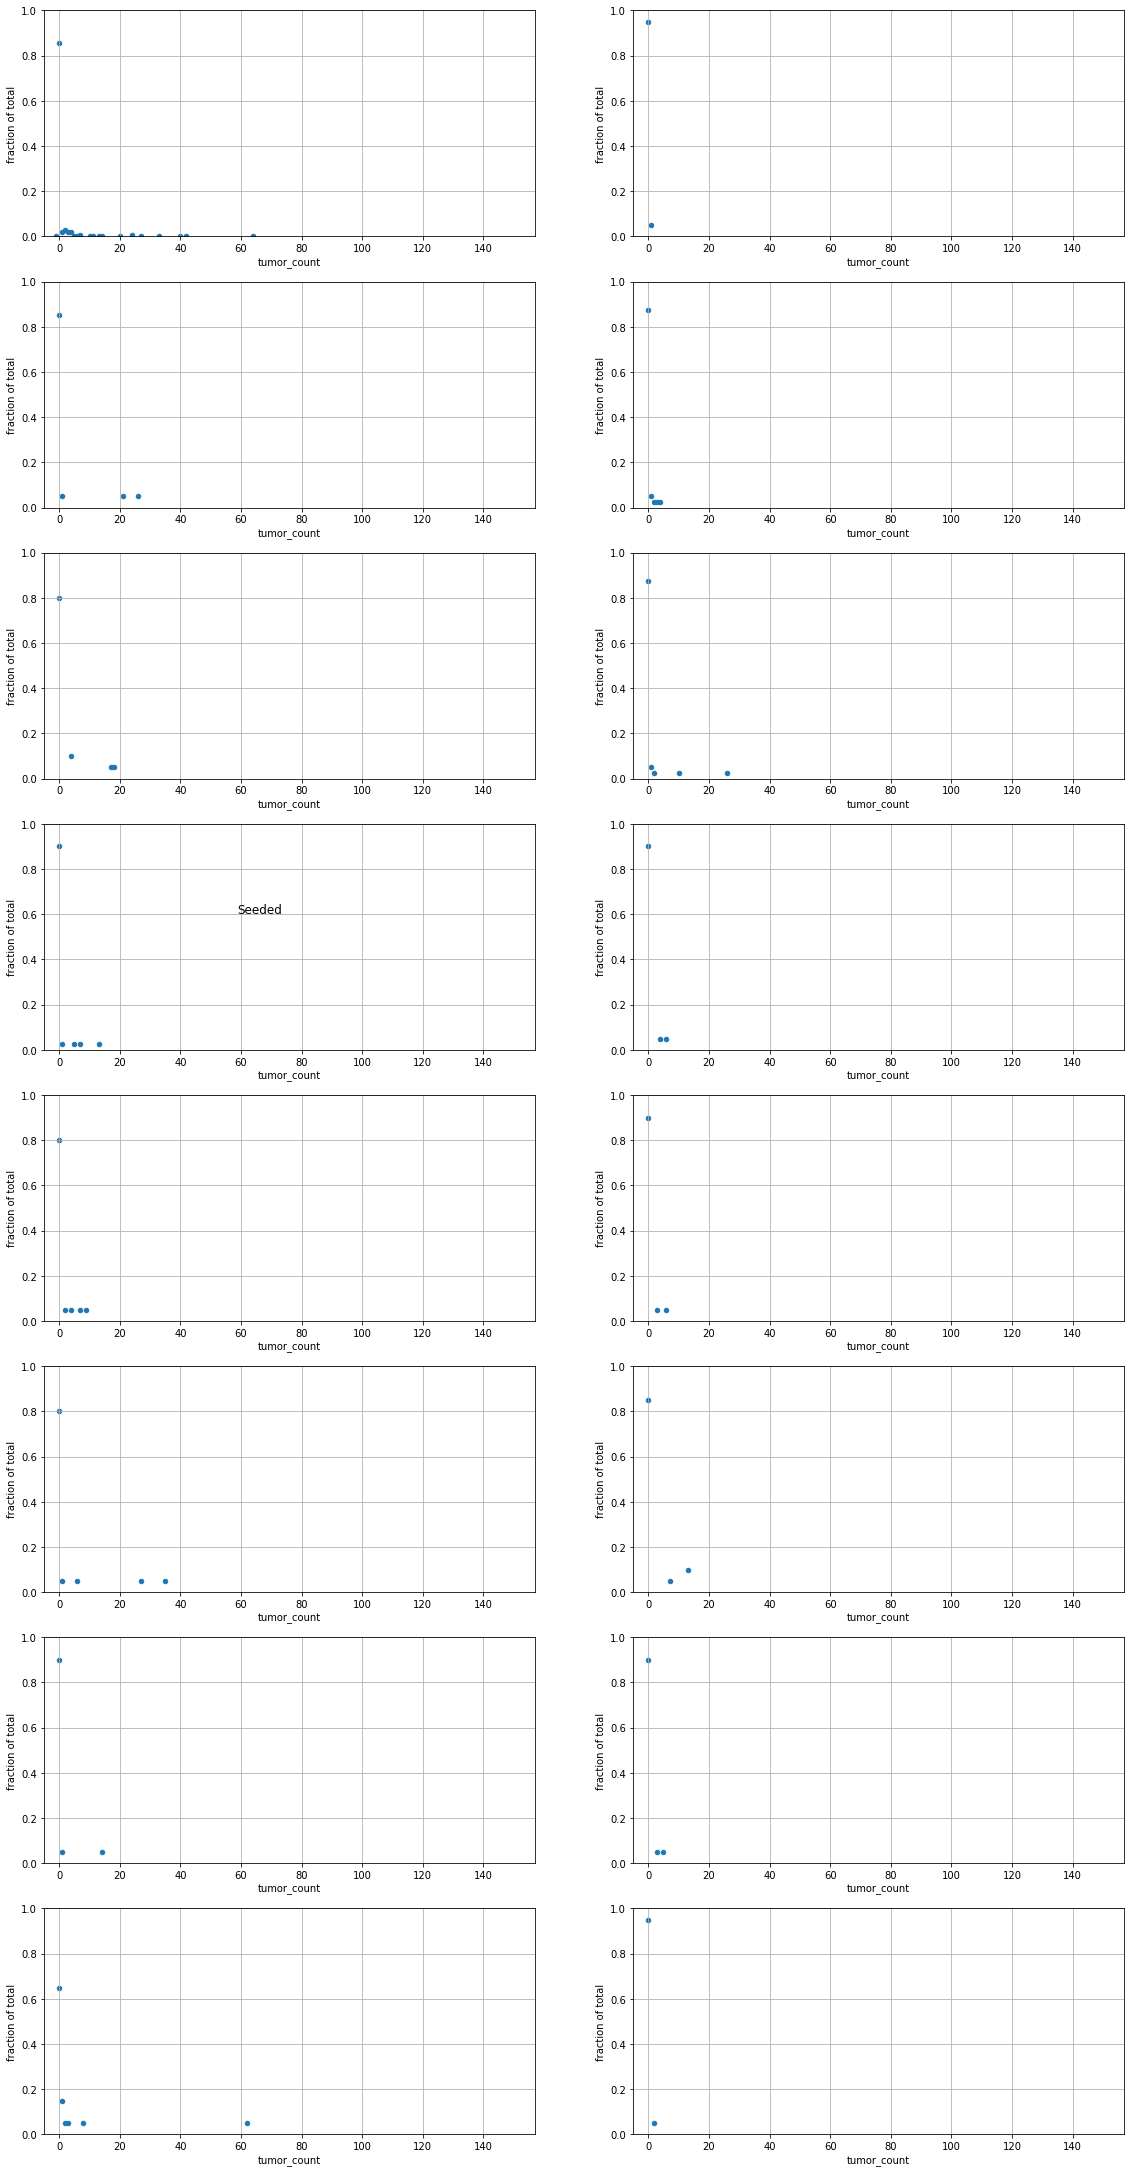

In [141]:
# import math

fig, axes = plt.subplots(nrows=int(math.ceil(len(stats) / 2)), ncols=2, figsize=(8, 20))
fig.suptitle("Seeded")
plt.subplots_adjust(right=2, top=1.6)

for i, stat in enumerate(stats):
    s = pd.Series(stat['frac'])
    df = s.to_frame()
    df.reset_index(inplace=True)
    df.columns = ['tumor_count', 'fraction of total']
    r = math.floor(i / 2)
    c = i % 2
    ax = axes[r][c]
    #ax.scatter(x=df['tumor_count'].values, y=df['count / total'].values)
    df.plot.scatter(x='tumor_count', y='fraction of total', grid=True, ax=axes[r,c])
    #ax.set_title(format_title(stat['params']), loc='left')
    ax.set_xlim(-5, 157)
    ax.set_ylim(0, 1.0)


#fig.delaxes(axes[16, 1])
#fig.savefig("/Users/nick/Desktop/unseeded.png")
    

    
    #ax = s.plot.scatter()
    #plt.show()
    

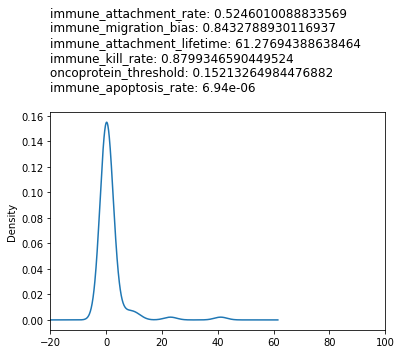

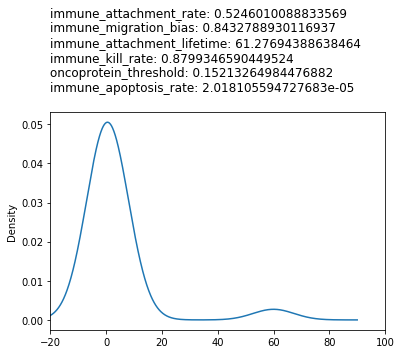

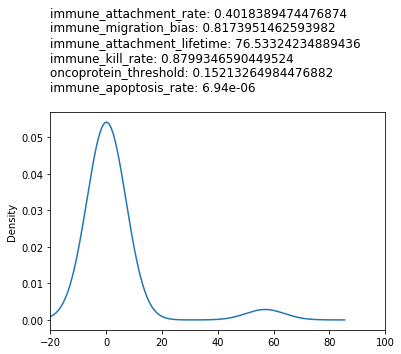

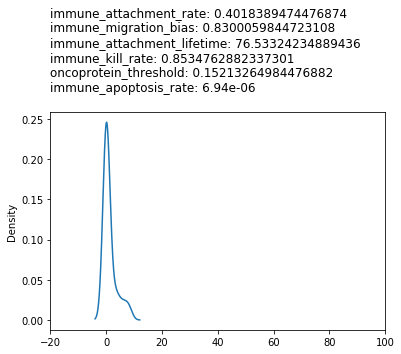

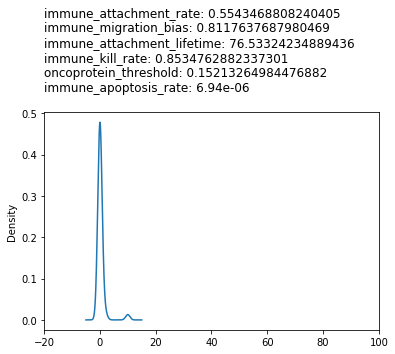

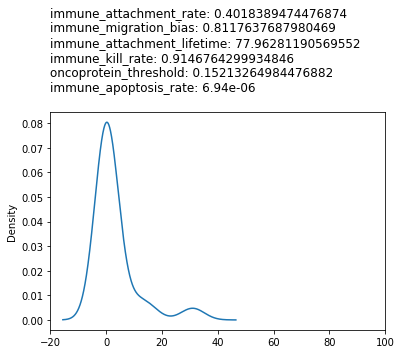

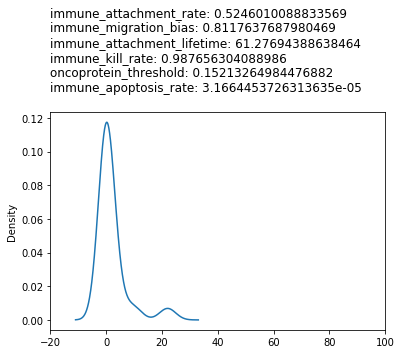

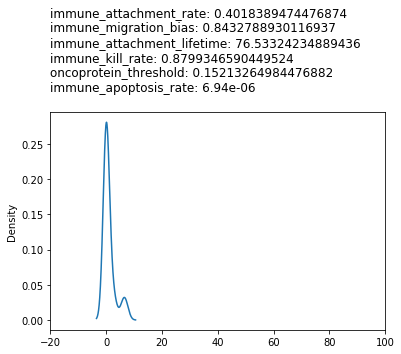

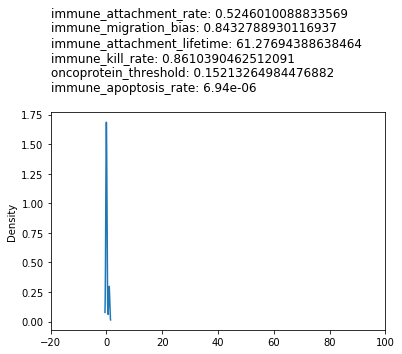

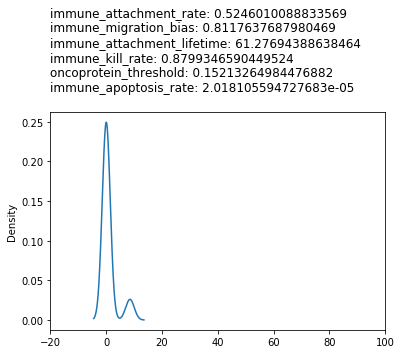

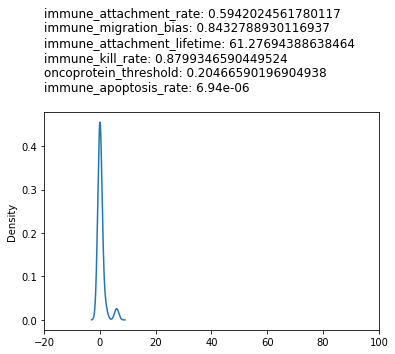

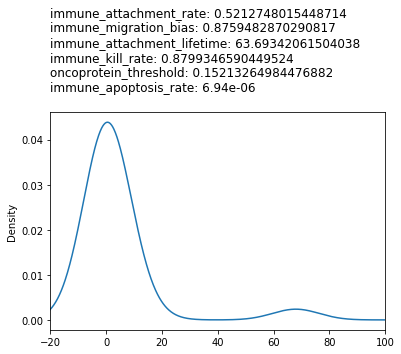

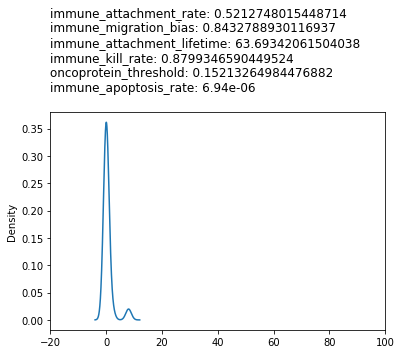

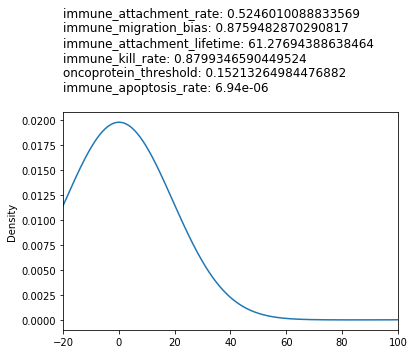

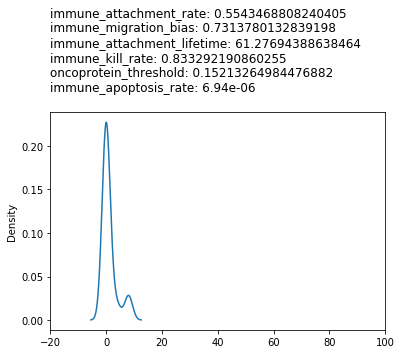

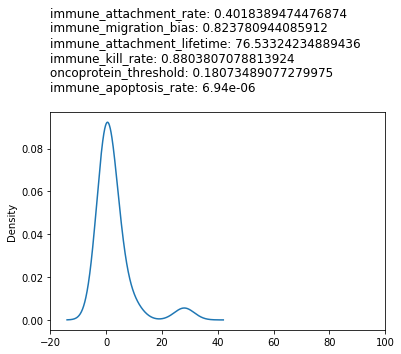

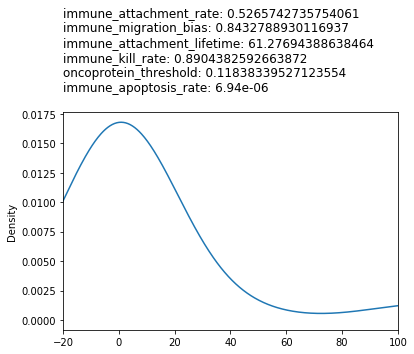

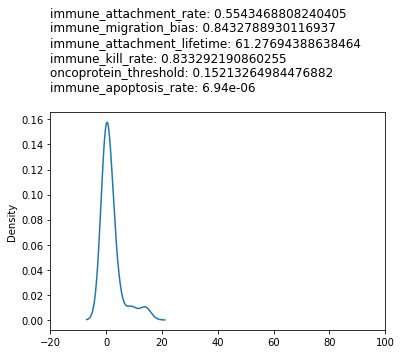

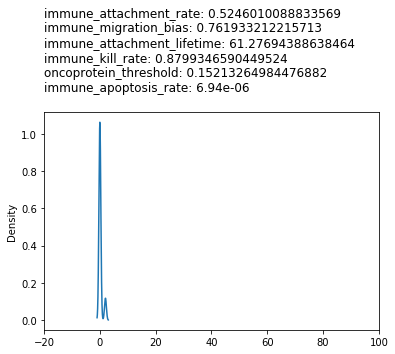

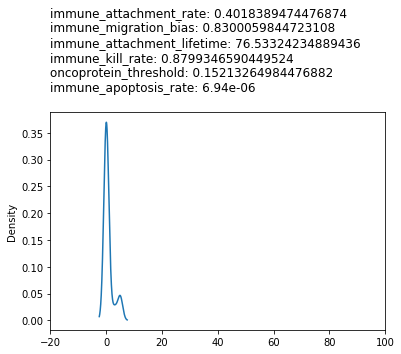

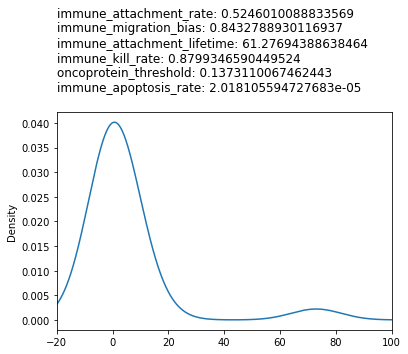

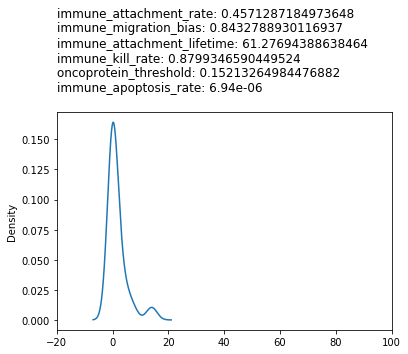

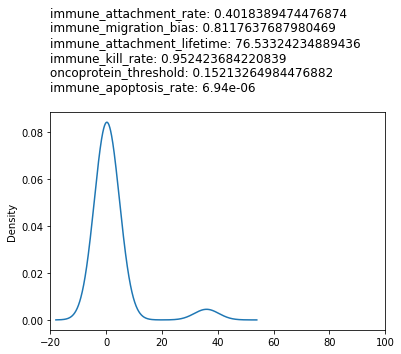

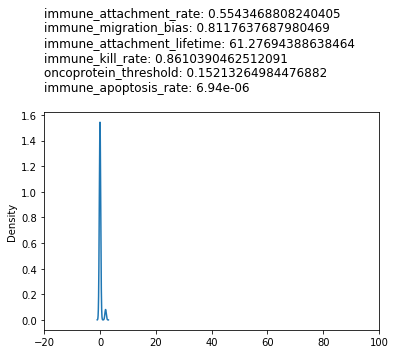

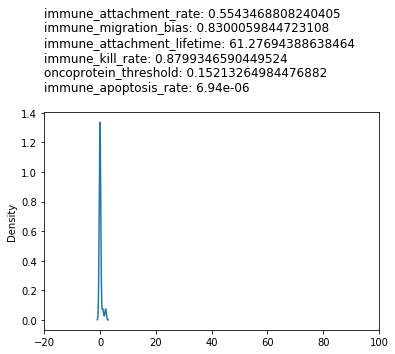

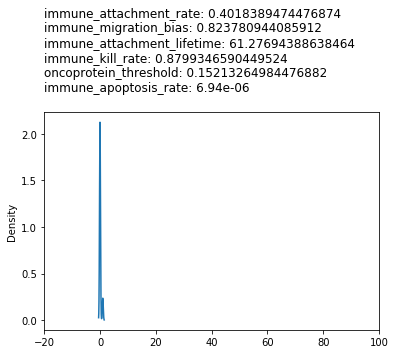

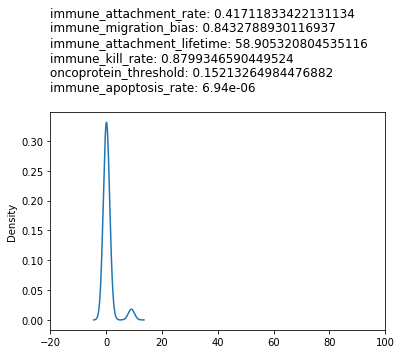

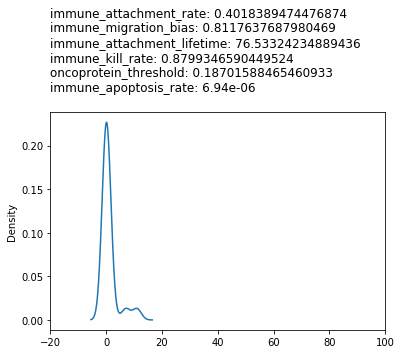

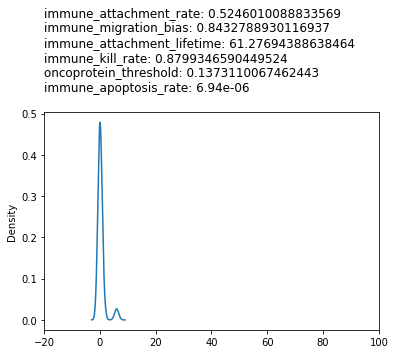

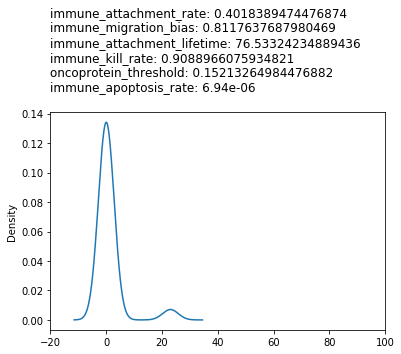

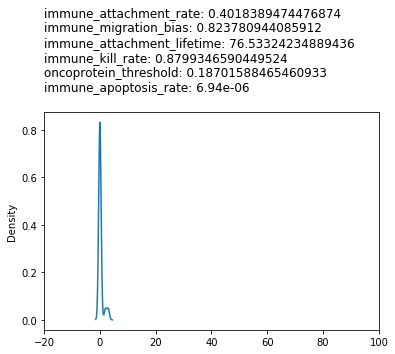

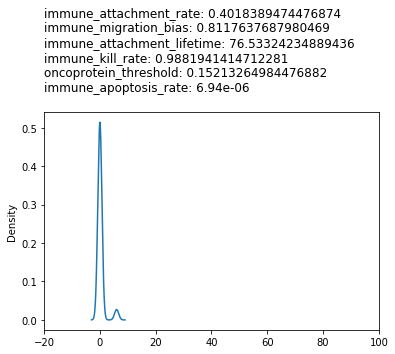

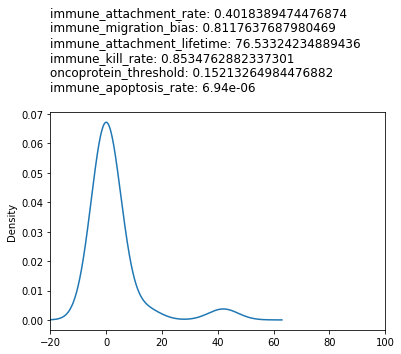

In [86]:
for stat in stats:
    s = pd.Series(stat['counts'])
    ax = s.plot.kde()
    plt.title(format_title(stat['params']), loc='left')
    ax.set_xlim(-20, 100)
    #s.plot.hist(bins=100, range=[-1, 100])
    plt.show()
    

In [5]:
cols = ['user_parameters.immune_apoptosis_rate',
     'user_parameters.immune_migration_bias',
     'user_parameters.immune_kill_rate',
     'user_parameters.immune_attachment_lifetime',
     'user_parameters.immune_attachment_rate',
     'user_parameters.oncoprotein_threshold']

seeded = ga_analysis.get_final_params("/Users/nick/Documents/results/physicell/ga_r1")
seeded = ga_analysis.get_unique_params(seeded)
unseeded = ga_analysis.get_final_params("/Users/nick/Documents/results/physicell/ga_r2")
unseeded = ga_analysis.get_unique_params(unseeded)

df_seeded = pd.DataFrame(seeded)
df_seeded = df_seeded[cols]
df_seeded.to_csv('/Users/nick/Documents/results/physicell/ga_r1/final_params.csv', index=False)

df_unseeded = pd.DataFrame(unseeded)
df_unseeded = df_unseeded[cols]
df_unseeded.to_csv('/Users/nick/Documents/results/physicell/ga_r2/final_params.csv', index=False)


In [6]:
import pickle

classifier_path = '/Users/nick/Documents/repos/PhysiCell-EMEWS-2/cancer-immune/EMEWS-scripts/data/rf.pkl'
scaler_path = '/Users/nick/Documents/repos/PhysiCell-EMEWS-2/cancer-immune/EMEWS-scripts/data/scaler.pkl'
with open(classifier_path, 'rb') as f_in:
    clf = pickle.load(f_in)

with open (scaler_path, 'rb') as f_in:
    scaler = pickle.load(f_in)


/Users/nick/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
# user_parameters.immune_apoptosis_rate	
# user_parameters.immune_migration_bias
# user_parameters.immune_kill_rate
# user_parameters.immune_attachment_lifetime
# user_parameters.immune_attachment_rate
# user_parameters.oncoprotein_threshold
def predict(row):
    pt = row.values
    spt = scaler.transform([pt])
    return clf.predict(spt)

df_unseeded.apply(predict, axis=1)

0     [0]
1     [0]
2     [0]
3     [0]
4     [0]
5     [0]
6     [0]
7     [0]
8     [0]
9     [0]
10    [0]
11    [0]
12    [0]
13    [0]
14    [0]
15    [0]
16    [0]
17    [0]
18    [0]
19    [0]
20    [0]
21    [0]
22    [0]
23    [0]
24    [0]
25    [0]
26    [0]
27    [0]
28    [0]
29    [0]
30    [0]
31    [0]
32    [0]
dtype: object